In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# 비지도학습이란?

In [3]:
# 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝을 가르킴
# 비지도 학습에서 학습 알고리즘은 입력 데이터만으로 데이터에서 지식을 추출할 수 있어야함

# 두가지 비지도 학습 존재
    # 1. 데이터의 비지도 변환, unsupervised transformation
    # 2. 데이터의 군집, clustering

## 비지도 변환

In [4]:
# 데이터를 새롭게 표현하여, 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘

# 비지도 변환이 널리 사용되는 분야 :
    # 특성이 많은 고차원 데이터를 특성의 수를 줄이면서, 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소(dimensionaliy reduction)
    # ex) 시각화를 위해 데이터 셋을 2차원으로 변경하는 경우
# 비지도 변환으로 데이터를 구성하는 단위나 성분을 찾기도함
    # ex) 큰 텍스트 문서에서 주제를 추출하는 것
    # 이때, 문서에서 이야기하는 주제들이 무엇인지 찾고 학습하는 것이 처리할 작업

## 군집 알고리즘

In [5]:
# 데이터를 비슷한 것끼리 그룹으로 묶는 것
    # ex) 소셜 미디어 사이트에서 사진을 업로드 할 때, 업로드한 사진을 분류하는 것.. 누구랑 찍었는지 얼마나 많은 사람들과 찍은 사진인지..

## 비지도 학습의 도전과제

In [6]:
# 비지도 학습에서 어려운 일, 알고리즘이 뭔가 유용한 것을 학습했는지 평가하는 것
# 보통 레이블이 없는 데이터에 적용하기 때문에, 무엇이 올바른 출력인지 모름, 모델이 일을 잘 하고 있는지 모름
    # 보통 결과를 평가하기 위해선 직접 결과를 확인 대조하는 것이 유일한 방법일 경우 다수

# 데이터 사이언티스트가 데이터를 더 잘 이해하고 싶을 때, 탐색적 분석 단계에서 많이 사용함
# 비지도 학습은 지도 학습의 전처리 단계에서도 사용
    # 비지도 학습의 결과로 표현된 데이터롤 사용하여 학습하면, 지도 학습 정확도가 좋아지기도 하며, 메모리와 시간 절약 가능

### 간단한 전처리 메소드(지도학습을 위한)

In [7]:
# 지도학습에서 전처리와 스테일 조정을 자주 사용, 그러나 스케일 조정 메서드는 지도 정보를 사용하지 않으므로 비지도 방식으로 볼 수 있음

### 데이터 전처리와 스케일 조정

In [8]:
# 지도학습의 SVM or 신경망의 경우 데이터의 스케일에 매우 민감함
# 그러므로 이런 알고리즘들에 맞게 데이터의 특성값을 조절함
# 보통 특성마다 스케일을 조정해서 데이털르 변경함

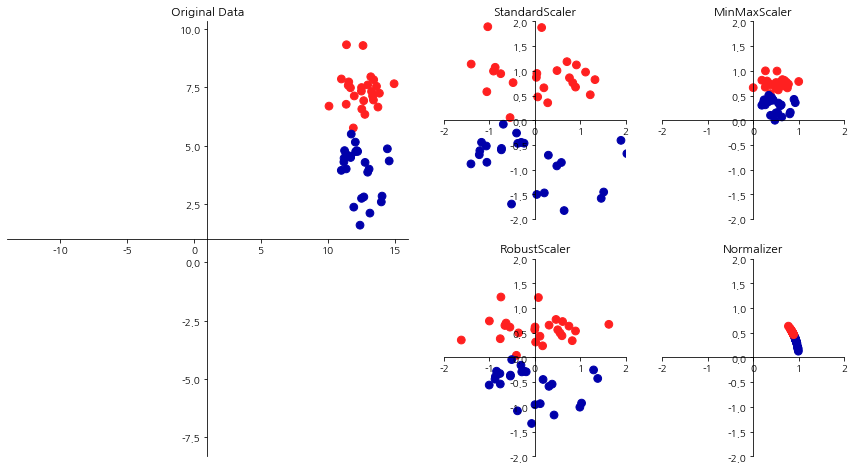

In [9]:
mglearn.plots.plot_scaling()

In [10]:
# (좌) 두개의 특성을 인위적으로 만든 이진 분류 데이터
    # 첫번째 특성(x축의 값) : 10 - 15 사이에 존재
    # 두번째 특성(y축의 값) : 0 - 10.0 사이에 존재
# (우) 데이터를 기준이 되는 범위로 변환하는 4가지 방법
    # 1. StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경
        # x - (평균) / 표준편차 ___z-점수or표준점수
        # 이 방법은 특성의 최대, 최소 값을 제한하진 않음
    # 2. RobustScaler : 특성들이 같은 스케일을 갖게된다는 통계적 측면에서는 StandardScaler 와는 비슷
        # 그러나, 평균과 분산 대신 중간값(median)과 사분위 값(quartile)사용
        # 중간값 : x보다 작은 수가 절반, x보다 큰수가 절반
        # 사분위값 : 1사분위, x보다 작은 수가 전체 개수의 1/4 _ 3사분위, x보다 작은 수가 전체 개수의 3/4 ...
        # 식 : ( x - 중간값 ) / ( 1사분위 - 3사분위 )
    # 3. MinMaxScaler : 각 값을 정확하게 0과 1사이에 위치하도록 변경
        # 식 : ( x - 최소값 ) / ( 최대값 - 최소값 == 전체범위 )
        # 2차원 데이터셋의 경우 모든 데이터가 x,y 축 0-1,0-1 범위에 담기게됨
    # 4. Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정
        # 노름 매개변수는 L1, L2, MAX 지원
        # 유클리디안을 가르키는 L2가 기본 매개변수
        # 1,2,3 방법의 경우는 각 열(특성)의 통계치를 이용, Normalizer는 행(데이터 포인트)마다 각기 정규화됨
        # 지름이 1인 원(3차원인 경우 구)에 데이터를 투영함
        # == 각 데이터 포인트가 다른 비율로(길이에 반비례) 스케일 조정
        # 이러한 정규화는 특성 벡터의 길이는 상관이 없고, 데이터의 방향(or 각도)이 중요할 때 많이 사용

### 데이터 변환 적용하기

In [11]:
# cancer dataset 사용, 커널SVM(SVC), MinMaxScaler
# 스케일을 조정하는 전처리 메서드는 보통 지도 학습 알고리즘을 적용하기 전에 적용함

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)


(426, 30)
(143, 30)


In [14]:
scaler = MinMaxScaler()
# fit 메서드에 훈련데이터를 적용
# MinMaxScaler 의 fit 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산함
# 회귀 모델과는 달리, 스케일 객체는 fit 메서드를 호출할때, 훈련데이터(X_train) 만을 넘겨주며, y_train은 사용하지 않음(라벨)
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))